Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


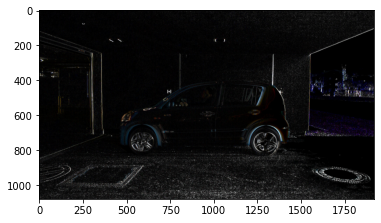

In [2]:
#Sobel-Filter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cv2

img = plt.imread("test.jpg")
result = np.abs(cv2.Sobel(img, cv2.CV_16S, 1, 0))

plt.imshow(result)

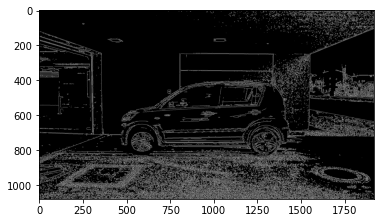

In [1]:
#canny edge detector
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cv2

img = cv2.imread('test.jpg', cv2.COLOR_BGR2GRAY)
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img, 40, 50)

plt.imshow(edges, cmap = 'gray')

In [2]:
#canny edge detector trackbars
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cv2

img = cv2.imread('test.jpg',0)

def nothing(x):
    pass
cv2.namedWindow("canny")
cv2.createTrackbar("t_high", "canny", 250, 2000, nothing)
cv2.createTrackbar("t_low", "canny", 60, 2000, nothing)
imgt=img.copy()
k=0
while(k!=27):
    cv2.imshow('canny',imgt)
    k = cv2.waitKey(1) & 0xFF
    th = cv2.getTrackbarPos('t_high','canny')
    tl = cv2.getTrackbarPos('t_low','canny')
    imgt=cv2.Canny(img, tl, th)

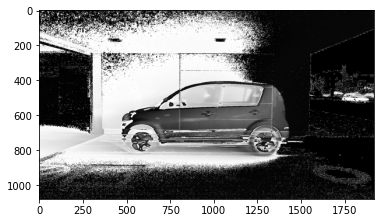

In [4]:
#subtraction
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cv2

test = cv2.imread('test.jpg',0)
none = cv2.imread('none.jpg',0)
img = (test-none)
plt.imshow(img, cmap = 'gray')

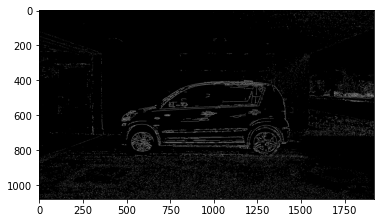

In [33]:
#canny edge detector with subtraction
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cv2

test = cv2.imread('test.jpg', cv2.COLOR_BGR2GRAY)
testc = cv2.Canny(test, 70, 70)
none = cv2.imread('none.jpg', cv2.COLOR_BGR2GRAY)
nonec = cv2.Canny(none, 40, 50)

img = (testc-nonec)

plt.imshow(img, cmap = 'gray')